Helper Notebook to visualize forgery masks

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Get image numbers from train_images/authentic
authentic_path = "data/train_images/authentic"
authentic_files = glob.glob(os.path.join(authentic_path, "*.png"))
authentic_nums = np.array(sorted([int(os.path.basename(f).replace(".png", "")) for f in authentic_files]))

# Get image numbers from train_images/forged
forged_path = "data/train_images/forged"
forged_files = glob.glob(os.path.join(forged_path, "*.png"))
forged_nums = np.array(sorted([int(os.path.basename(f).replace(".png", "")) for f in forged_files]))

# Get image numbers from supplemental_images
supplemental_path = "data/supplemental_images"
supplemental_files = glob.glob(os.path.join(supplemental_path, "*.png"))
supplemental_nums = np.array(sorted([int(os.path.basename(f).replace(".png", "")) for f in supplemental_files]))

print(f"Authentic images: {len(authentic_nums)}")
print(f"Forged images: {len(forged_nums)}")
print(f"Supplemental images: {len(supplemental_nums)}")

Authentic images: 2377
Forged images: 2751
Supplemental images: 48


In [3]:
# Forgery Mask Visualizer
def visualize_forgery_mask(img_num, train):
    """
    Summary:
        Visualize the forgery mask of an image
    Args:
        img_num (int): Image number
        train (boolean): If True, from train_images/forged, otherwise from supplemental_images
    """
    if train:
        img_path = f"data/train_images/forged/{img_num}.png"
        mask_path = f"data/train_masks/{img_num}.npy"
    else:
        img_path = f"data/supplemental_images/{img_num}.png"
        mask_path = f"data/supplemental_masks/{img_num}.npy"

    # Load image
    img = np.array(Image.open(img_path).convert("RGB"))
    H, W = img.shape[:2]

    # Load mask and drop the leading 1
    mask = np.load(mask_path)          # (1, 512, 648)
    mask = mask[0]                     # (512, 648)

    # Binary mask
    mask_bin = (mask > 0).astype(np.uint8)

    # Create red overlay on forged pixels
    overlay = img.copy()
    overlay[mask_bin == 1] = [255, 0, 0]

    # Blend for transparency
    alpha = 0.4
    blended = (alpha * overlay + (1 - alpha) * img).astype(np.uint8)

    plt.figure(figsize=(8, 8))
    plt.imshow(blended)
    plt.axis("off")
    if train:
        plt.title(f"data/train_images/forged/{img_num}.png with mask overlay")
    else:
        plt.title(f"data/supplemental_images/forged/{img_num}.png with mask overlay")
    plt.show()

Text(0.5, 1.0, 'Authentic')

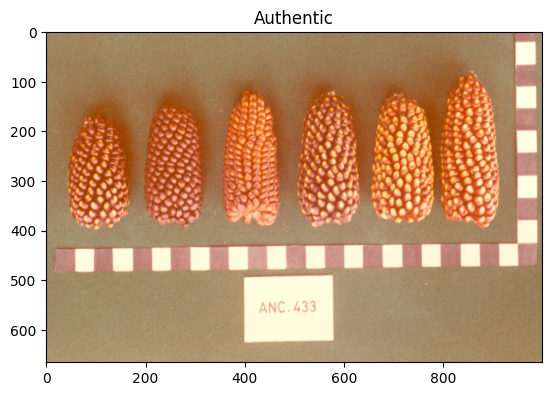

In [13]:
img_path = f"data/train_images/authentic/{num}.png"
plt.imshow(Image.open(img_path).convert("RGB"))
plt.title("Authentic")

Text(0.5, 1.0, 'Forged')

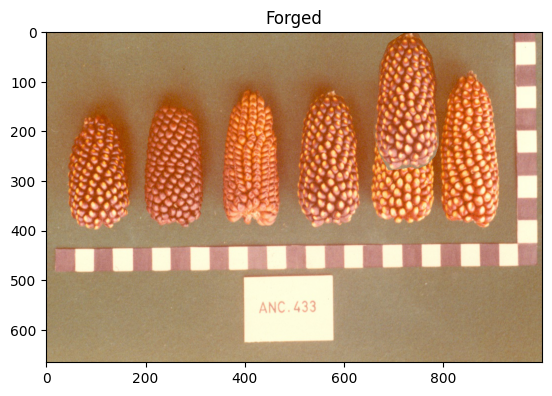

In [15]:
img_path = f"data/train_images/forged/{num}.png"
plt.imshow(Image.open(img_path).convert("RGB"))
plt.title("Forged")

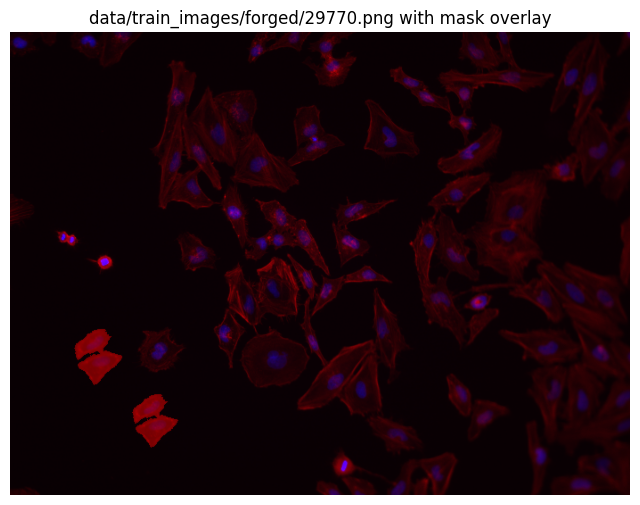

In [166]:
# Sample and visualize a forged image on train set
num = np.random.choice(forged_nums)
visualize_forgery_mask(num, train=True)

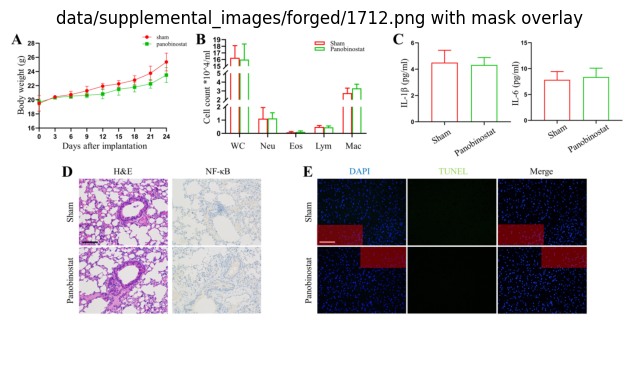

In [40]:
# Sample and visualize a forged image on supplemental set
visualize_forgery_mask(np.random.choice(supplemental_nums), train=False)